## Implementando o algoritmo do filtro de Wiener

### Importando Bibliotecas

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Importando imagem

In [12]:
!wget https://links.uwaterloo.ca/Repository/TIF/boat.tif

--2023-09-19 15:29:09--  https://links.uwaterloo.ca/Repository/TIF/boat.tif
Resolvendo links.uwaterloo.ca (links.uwaterloo.ca)... 129.97.206.16
Conectando-se a links.uwaterloo.ca (links.uwaterloo.ca)|129.97.206.16|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 262274 (256K) [image/tiff]
Salvando em: ‘boat.tif’

boat.tif            100%[===================>] 256,13K   398KB/s    em 0,6s    

2023-09-19 15:29:10 (398 KB/s) - ‘boat.tif’ salvo [262274/262274]



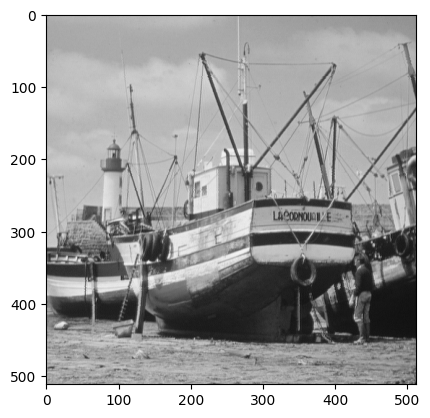

In [13]:
img = cv2.imread('boat.tif')  # armazena a imagem na variável

img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)  # converte a imagem para escalas de cinza (aparentemente a imagem ainda estava como RGB)

plt.imshow(img, cmap='gray')  # plota a imagem

### Adicionando ruído e Implementando o filtro

In [14]:
# realiza a conversão da imagem para uma matriz numérica para realizar os cálculos pixel a pixel
matriz = np.array(img)

In [15]:
# cálculo e adição do ruído gaussiano à imagem
def ruido_gaussiano(img, med, var):
    ruido = np.random.normal(med, var, img.shape) # calcula o ruído
    img_ruido = img + ruido # adiciona ruído à imagem
    return img_ruido

In [16]:
# implementação do filtro de Wiener adaptativo pontual
def filtro_wiener(img, kernel, var):
    t_matriz = len(img)
    img = img.astype(float)

    img_filtrada = np.zeros((t_matriz, t_matriz)) # cria matiz que receberá imagem filtrada

    for i in range(t_matriz):
        for j in range(t_matriz):
            inicio_i = max(0, i - kernel // 2) # posição inicial do filtro (i)
            inicio_j = max(0, j - kernel // 2) # posição inicial do filtro (j)
            final_i = min(t_matriz, i + kernel // 2 + 1) # posição final do filtro (i)
            final_j = min(t_matriz, j + kernel // 2 + 1) # posição final do filtro (j)
            
            parte = img[inicio_i:final_i, inicio_j:final_j] # parte da imagem de entrada
            media = np.mean(parte) # média dos pixels nessa parte
            variancia = np.var(parte, ddof=1) # variância dos pixels nessa parte
            var_local = max((variancia - var), 0) # variância local na imagem sem ruídos
            # calcula a estimativa
            if var_local == 0:
                img_filtrada[i][j] = media
            else:
                img_filtrada[i][j] = media + (var_local / (var_local + var)) * (img[i][j] - media)

    return img_filtrada

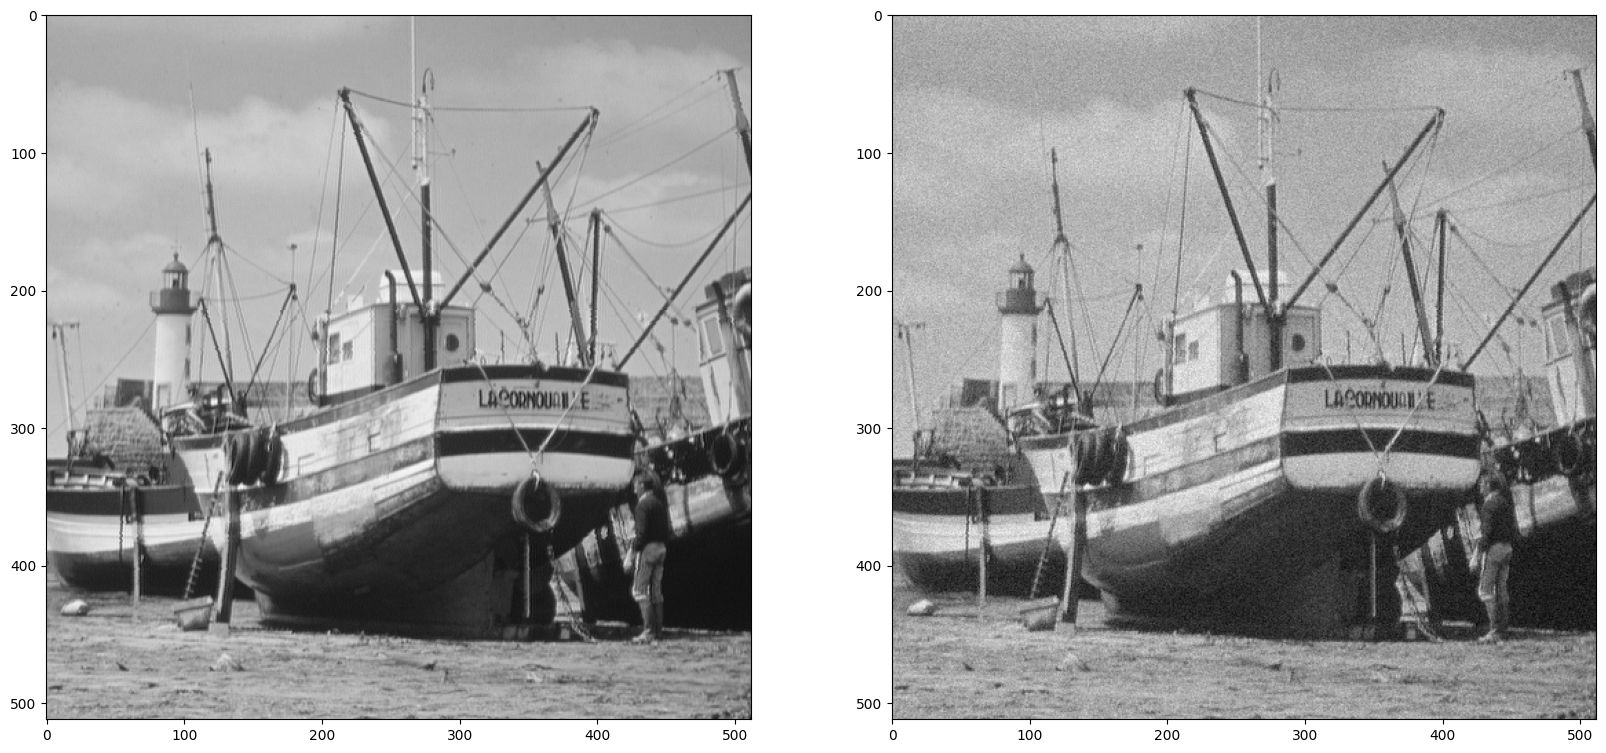

In [17]:
# adiciona ruído à imagem
img_ruido = ruido_gaussiano(matriz, 0, 10) # média é 0 e variância é 10

figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(img_ruido, cmap='gray')

#### <center> Imagem original e imagem com ruído, respectivamente

### Aplicando o filtro com janela 5x5

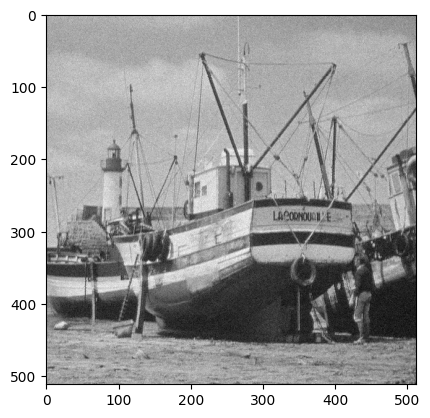

In [18]:
# aplica o filtro com janela 5x5
img_filtrada_5x5 = filtro_wiener(img_ruido, 5, 10) # tamanho do kernel é 5 e variância é 10

plt.imshow(img_filtrada_5x5, cmap='gray')

### Aplicando o filtro com janela 7x7

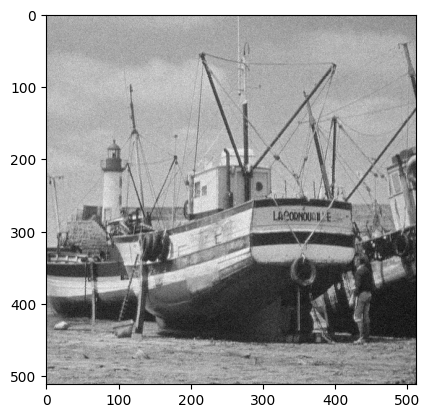

In [19]:
# aplica o filtro com janela 7x7
img_filtrada_7x7 = filtro_wiener(img_ruido, 7, 10) # tamanho do kernel é 7 e variância é 10

plt.imshow(img_filtrada_7x7, cmap='gray')

### Comparação entre diferentes tamanhos de janela

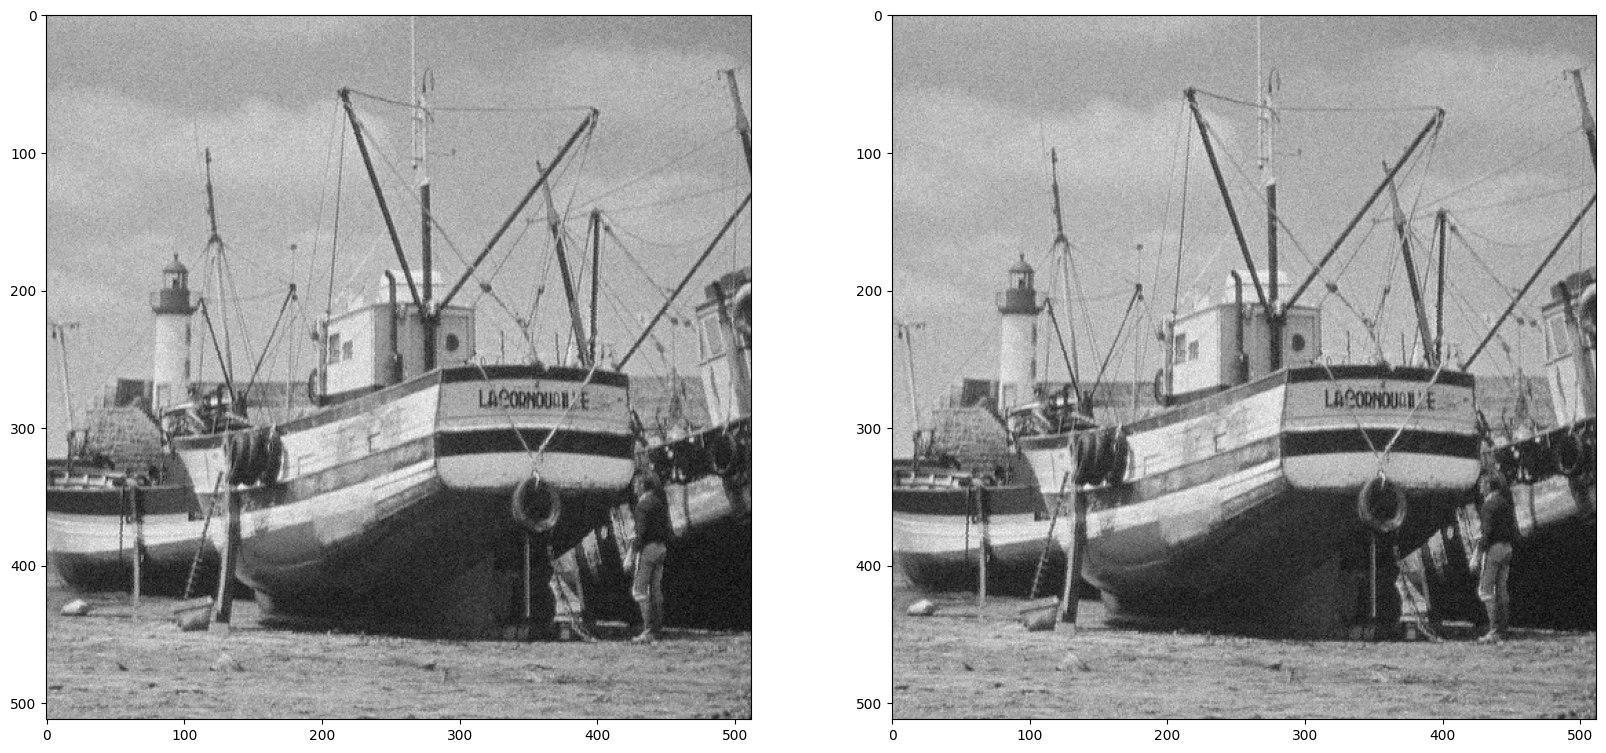

In [20]:
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(img_filtrada_5x5, cmap='gray')
axarr[1].imshow(img_filtrada_7x7, cmap='gray')

#### <center> Imagem filtrada com janela 5x5 e com janela 7x7, respectivamente

Analisando as filtragens com diferentes tamanhos de janela, é possível perceber que a diferença entre elas é muito sutil, quase imperceptível. Contudo, é possível perceber que na filtragem com janela 7x7, o realce é um pouco maior que na filtragem com janela 5x5.